In [1]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Setup
**bureau**:
- Data concerning client's previous credits from other financial institutions. 
- Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

In [0]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
df_bureau = pd.read_csv(os.path.join(DATA_DIRECTORY, 'bureau.csv'), nrows= None)
df_bureau.head()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
df_bureau_bal = pd.read_csv(os.path.join(DATA_DIRECTORY, 'bureau_balance.csv'), nrows= None)
df_bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [0]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [0]:
df_bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [0]:
def statistical_analyzing(df_input):
  """
  This function assits to expand Exploratory Data Analysis (EDA) is an open-ended 
  process where we calculate statistics and make figures to find trends, anomalies,
  patterns, or relationships within the data. The goal of EDA is to learn what our
  data can tell us. It generally starts out with a high level overview, 
  then narrows in to specific areas as we find intriguing areas of the data. """
  # check number of rows, cols
  no_rows = df_input.shape[0]
  no_cols = df_input.shape[1]
  print("No. observations:", no_rows )
  print("No. features:", no_cols )
  
  # checking type of features
  name = []
  cols_type = []
  for n,t in df_input.dtypes.iteritems():
    name.append(n)
    cols_type.append(t)
    
  # checking distinction (unique values) of features
  ls_unique = []
  for cname in df_input.columns:
    try:
      nunique = df_input[cname].nunique()
      pct_unique = nunique*100.0/ no_rows
      ls_unique.append("{} ({:0.2f}%)".format(nunique, pct_unique))
    except:
      ls_unique.append("{} ({:0.2f}%)".format(0,0))
      continue
  # checking missing values of features
  ls_miss = []
  for cname in df_input.columns:
    try:
      nmiss = df_input[cname].isnull().sum()
      pct_miss = nmiss*100.0/ no_rows
      ls_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    except:
      ls_miss.append("{} ({:0.2f}%)".format(0,0))
      continue 
      
  # checking zeros
  ls_zeros = []
  for cname in df_input.columns:
    try:
      nzeros = (df_input[cname] == 0).sum()
      pct_zeros = nzeros * 100.0/ no_rows
      ls_zeros.append("{} ({:0.2f}%)".fornat(nzeros, pct_zeros))
    except:
      ls_zeros.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # checking negative values
  ls_neg = []
  for cname in df_input.columns:
    try:
      nneg = (df_input[cname].astype("float")<0).sum()
      pct_neg =nneg * 100.0 / no_rows
      ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
    except:
      ls_neg.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # extracting the output
  data = {
      "name": name,
      "col_type": cols_type,
      "n_unique": ls_unique,
      "n_miss": ls_miss,
      "n_zeros":ls_zeros,
      "n_neg":ls_neg      
  }
  
  # statistical info
  df_stats = df_input.describe().transpose()
  ls_stats = []
  for stat in df_stats.columns:
    data[stat] = []
    for cname in df_input.columns:
      try:
        data[stat].append(df_stats.loc[cname, stat])
      except:
        data[stat].append(0.0)
        
  # take samples
  df_sample = df_input.sample(frac = .5).head().transpose()
  df_sample.columns = ["sample_{}".format(i) for i in range(5)]
  
  # repair the output
  col_ordered = ["name","col_type","n_unique","n_miss","n_zeros","n_neg",
                "25%","50%","75%","count","max","mean","min","std"]
  df_data = pd.DataFrame(data, columns = col_ordered).set_index("name")
  df_data = pd.concat([df_data, df_sample], axis = 1)
  
  return df_data   

In [0]:
def plot_categorical(cols, target, df):
  for col in cols:
    if target == None:
      sns.countplot(x=col, data=df[[col]] ,  palette="Reds_d")      
    else:
      print('Column name: %s' %col)
      sns.countplot(x=col, hue=target, data=df[[col,target]], palette="Reds_d")
      #sns.barplot(x=col, y=target, data=df[[col,target]]
      #        , palette="Reds_d", estimator = sum)
      plt.legend()
    plt.xticks(rotation=90)#-60    
    plt.show()

"""Plotting the continous features :    
1. A box plot (or box-and-whisker plot) shows the distribution of quantitative data 
in a way that facilitates comparisons between variables.
2. Distribution graph :to check the linearity of the variables and look 
for skewness of features."""
def plot_continous(cols, target, df):
  # Using boxplot to analyze the continous feature
  for col in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    if target == None:
      plot = sns.boxplot(col, whis=1.5, data=df)
    else:
      plot = sns.boxplot(x=target, y=col, whis=1.5, data=df)
      plt.legend()
    # which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
    # or interquartile range (IQR)
    # therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Column name: %s' %col)    
    print('> No.outliner: %d \n' %((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum())
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())#.hist(bins=20)
    fig.set_ylabel('Volumn')
    fig.set_xlabel(col)    
    plt.show() 

In [0]:
cate_cols = [col for col in df_bureau.columns if df_bureau[col].dtype == 'object']

cons_cols = list(set(df_bureau.columns) - set(cate_cols))

# key

In [0]:
statistical_analyzing(df_bureau[["SK_ID_CURR","SK_ID_BUREAU"]])

No. observations: 1716428
No. features: 2


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
SK_ID_CURR,int64,305811 (17.82%),0 (0.00%),0 (0.00%),0 (0.00%),188866.75,278055.0,367426.00,1716428.0,456255.0,2.782149e+05,100001.0,102938.558112,157652,183346,281075,433828,174267
SK_ID_BUREAU,int64,1716428 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),5463953.75,5926303.5,6385681.25,1716428.0,6843457.0,5.924434e+06,5000000.0,532265.728552,6104217,5105556,5935362,5261933,5042244


# categorical


In [0]:
cate_cols.sort()
statistical_analyzing(df_bureau[cate_cols])


No. observations: 1716428
No. features: 3


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
CREDIT_ACTIVE,object,4 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),NaN,NaN,NaN,1716428,NaN,NaN,NaN,NaN,Active,Active,Closed,Closed,Active
CREDIT_CURRENCY,object,4 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),NaN,NaN,NaN,1716428,NaN,NaN,NaN,NaN,currency 1,currency 1,currency 1,currency 1,currency 1
CREDIT_TYPE,object,15 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),NaN,NaN,NaN,1716428,NaN,NaN,NaN,NaN,Credit card,Credit card,Credit card,Consumer credit,Credit card


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


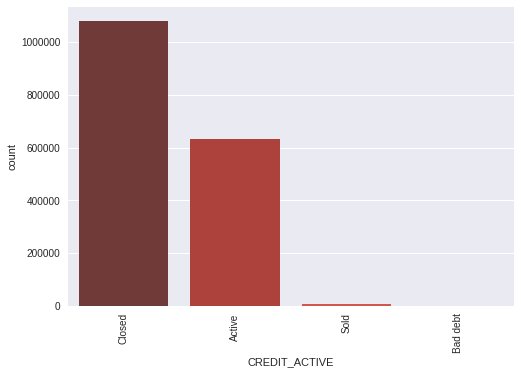

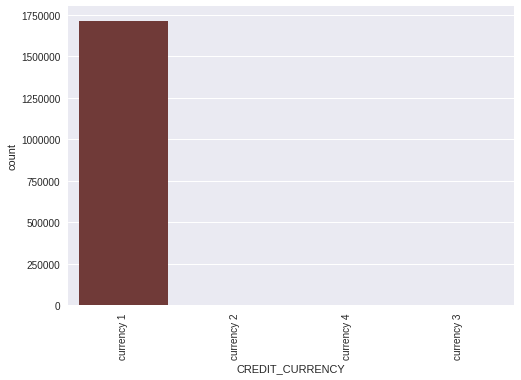

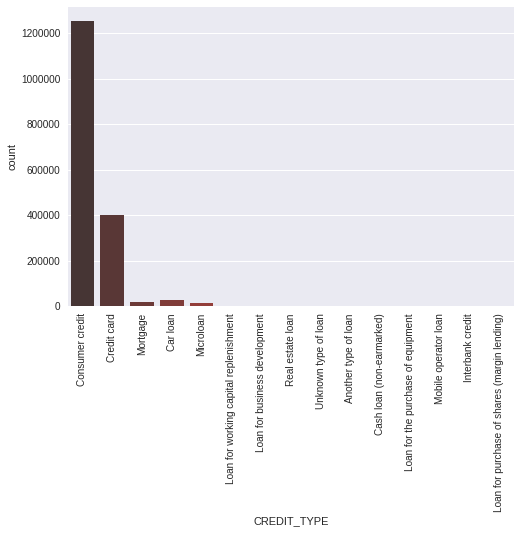

In [0]:
plot_categorical(cate_cols,None,df_bureau)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


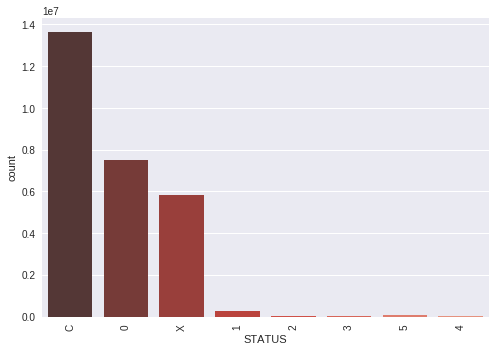

In [0]:
cols = [col for col in df_bureau_bal.columns if df_bureau_bal[col].dtype == 'object']
plot_categorical(cols,None,df_bureau_bal)

# continous


In [0]:
cons_cols.sort()
statistical_analyzing(df_bureau[cons_cols])

No. observations: 1716428
No. features: 14


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
AMT_ANNUITY,float64,40321 (2.35%),1226791 (71.47%),0 (0.00%),0 (0.00%),0.00,0.0,13500.00,489637.0,1.184534e+08,1.571276e+04,0.000,3.258269e+05,NaN,NaN,NaN,10575.0,0.0
AMT_CREDIT_MAX_OVERDUE,float64,68251 (3.98%),1124488 (65.51%),0 (0.00%),0 (0.00%),0.00,0.0,0.00,591940.0,1.159872e+08,3.825418e+03,0.000,2.060316e+05,NaN,0.0,62.145,NaN,NaN
AMT_CREDIT_SUM,float64,236708 (13.79%),13 (0.00%),0 (0.00%),0 (0.00%),51300.00,125518.5,315000.00,1716415.0,5.850000e+08,3.549946e+05,0.000,1.149811e+06,445500.0,109822.5,57183.840,135000.0,954000.0
AMT_CREDIT_SUM_DEBT,float64,226537 (13.20%),257669 (15.01%),0 (0.00%),8418 (0.49%),0.00,0.0,40153.50,1458759.0,1.701000e+08,1.370851e+05,-4705600.320,6.774011e+05,0.0,70719.3,0.000,NaN,0.0
AMT_CREDIT_SUM_LIMIT,float64,51726 (3.01%),591780 (34.48%),0 (0.00%),351 (0.02%),0.00,0.0,0.00,1124648.0,4.705600e+06,6.229515e+03,-586406.115,4.503203e+04,0.0,0.0,0.000,NaN,0.0
AMT_CREDIT_SUM_OVERDUE,float64,1616 (0.09%),0 (0.00%),0 (0.00%),0 (0.00%),0.00,0.0,0.00,1716428.0,3.756681e+06,3.791276e+01,0.000,5.937650e+03,0.0,0.0,0.000,0.0,0.0
CNT_CREDIT_PROLONG,int64,10 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.00,0.0,0.00,1716428.0,9.000000e+00,6.410406e-03,0.000,9.622391e-02,0.0,0.0,0.000,0.0,0.0
CREDIT_DAY_OVERDUE,int64,942 (0.05%),0 (0.00%),0 (0.00%),0 (0.00%),0.00,0.0,0.00,1716428.0,2.792000e+03,8.181666e-01,0.000,3.654443e+01,0.0,0.0,0.000,0.0,0.0
DAYS_CREDIT,int64,2923 (0.17%),0 (0.00%),0 (0.00%),1716403 (100.00%),-1666.00,-987.0,-474.00,1716428.0,0.000000e+00,-1.142108e+03,-2922.000,7.951649e+02,-2396.0,-254.0,-643.000,-1876.0,-2288.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text yticklabel objects>)

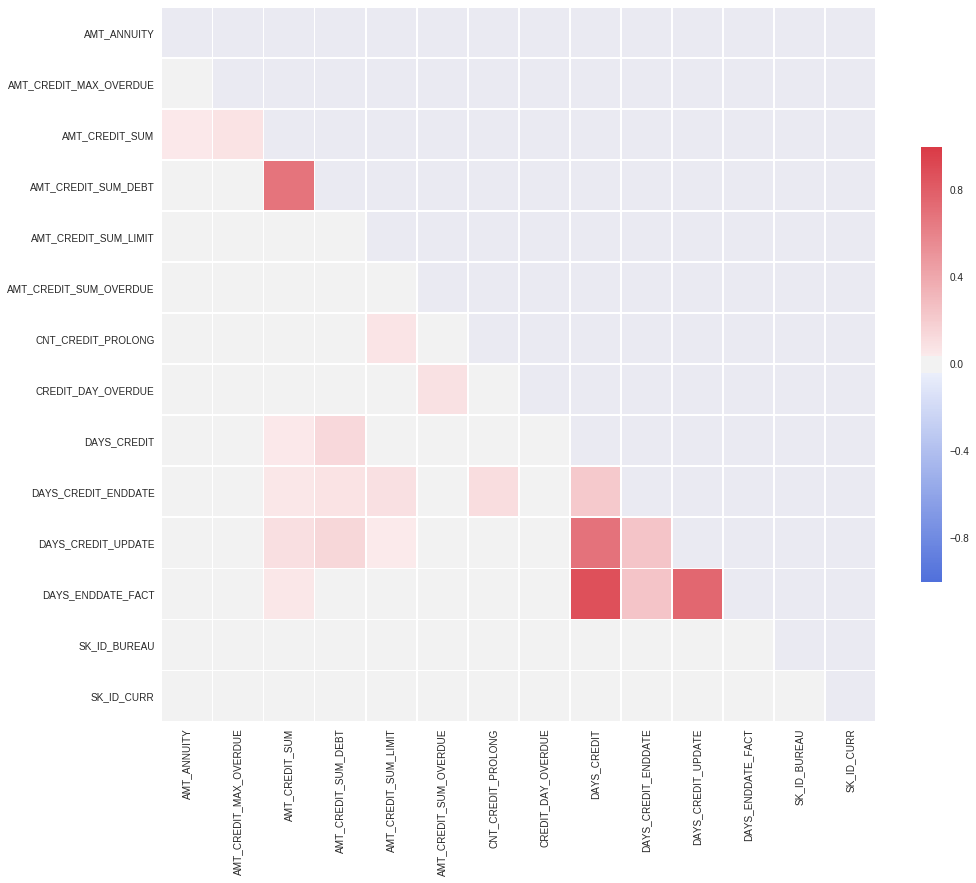

In [0]:
correlations = df_bureau[cons_cols].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#correlations

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Column name: AMT_ANNUITY
> No.outliner: 43918 



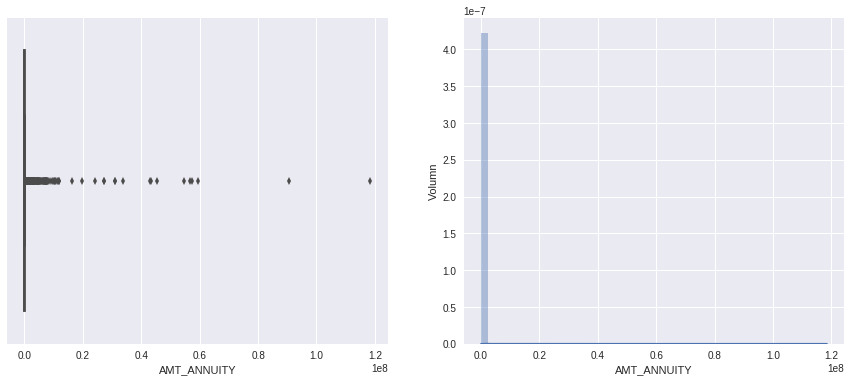

Column name: AMT_CREDIT_MAX_OVERDUE
> No.outliner: 121290 



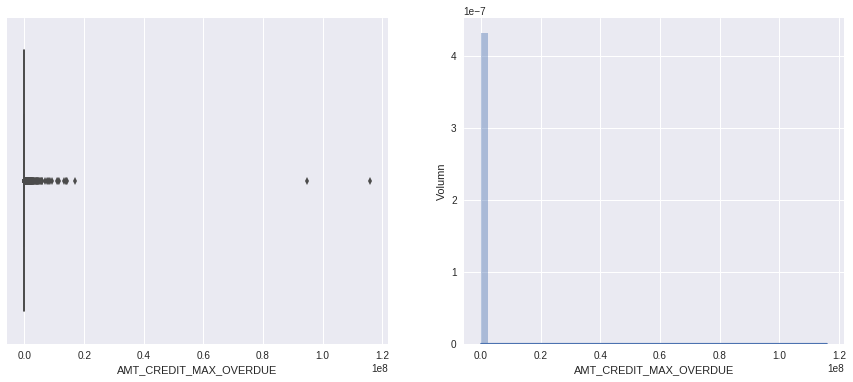

Column name: AMT_CREDIT_SUM
> No.outliner: 187998 



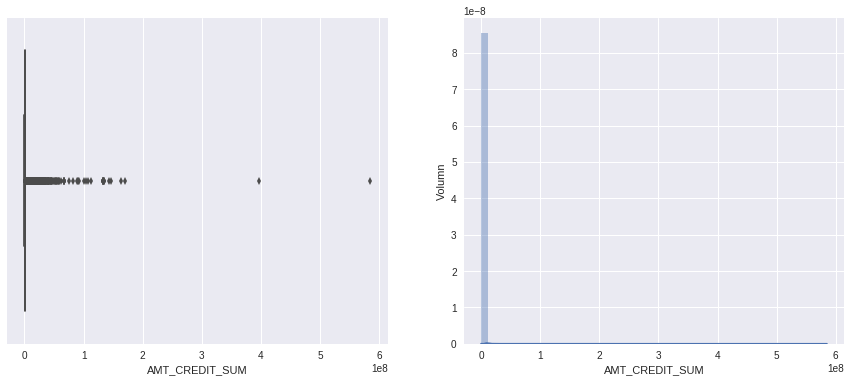

Column name: AMT_CREDIT_SUM_DEBT
> No.outliner: 280455 



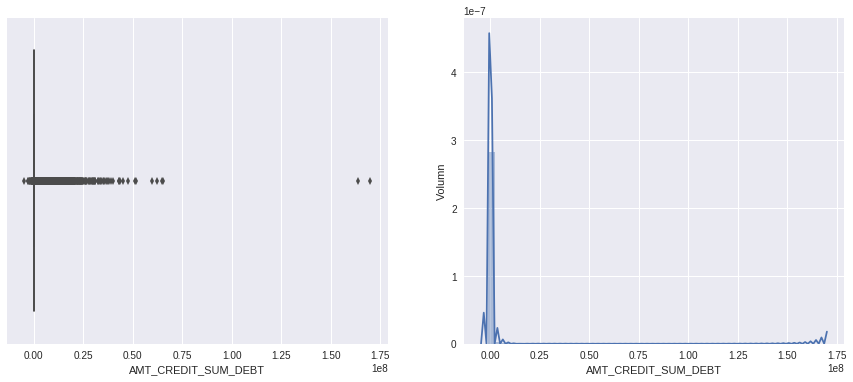

Column name: AMT_CREDIT_SUM_LIMIT
> No.outliner: 74506 



In [0]:
cols = ['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT']#, 'AMT_CREDIT_SUM_OVERDUE']-[]
# 'CNT_CREDIT_PROLONG', 'CREDIT_DAY_OVERDUE',
#  'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE', 'DAYS_ENDDATE_FACT',]
plot_continous(cols, None, df_bureau)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Column name: CNT_CREDIT_PROLONG
> No.outliner: 9114 



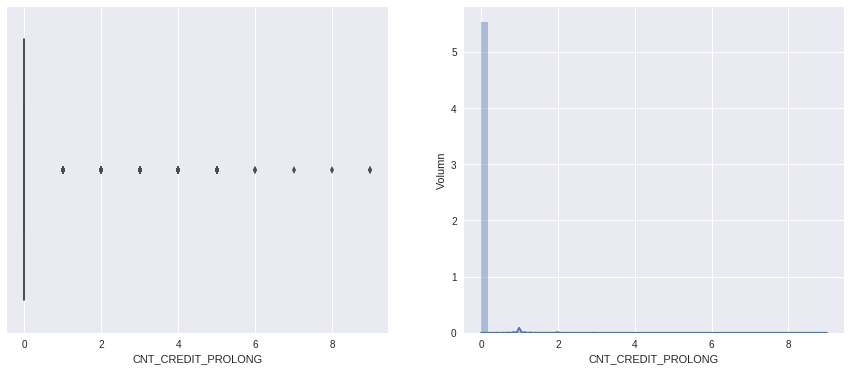

Column name: CREDIT_DAY_OVERDUE
> No.outliner: 4217 



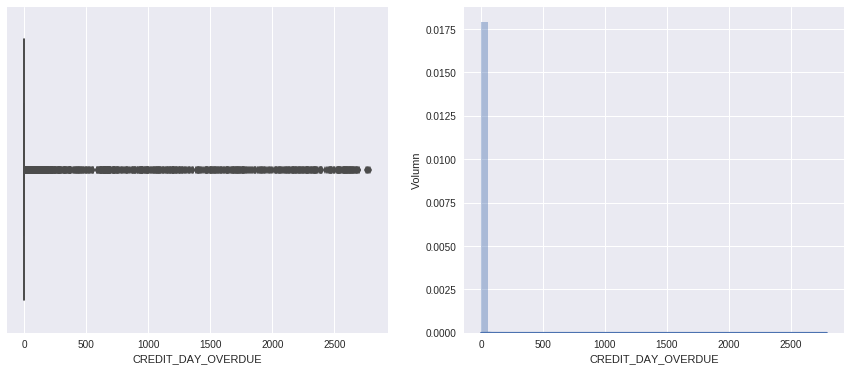

Column name: DAYS_CREDIT
> No.outliner: 0 



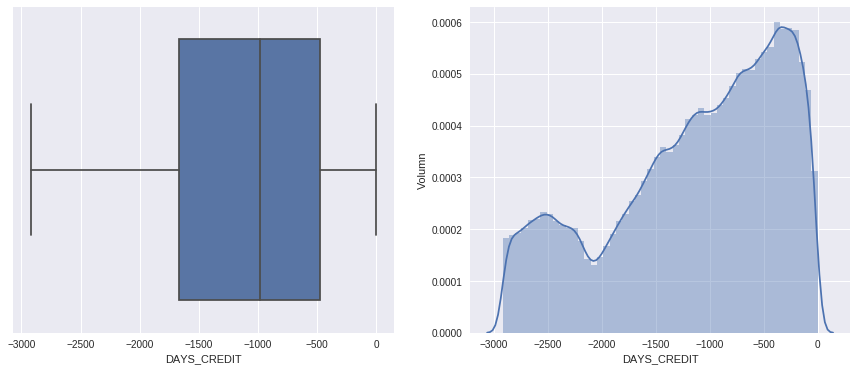

Column name: DAYS_CREDIT_ENDDATE
> No.outliner: 79340 



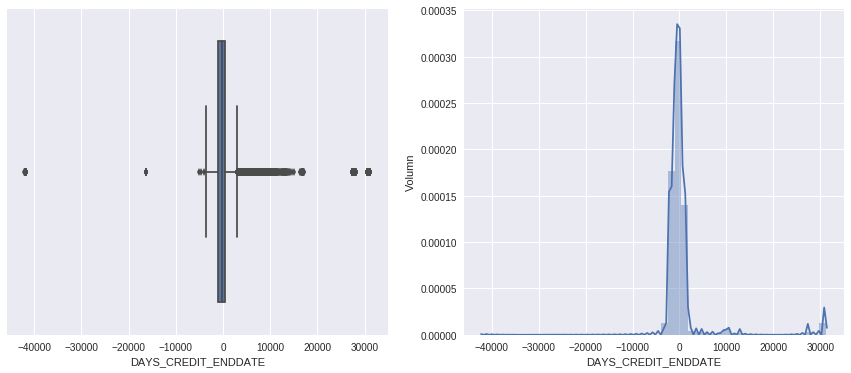

Column name: DAYS_CREDIT_UPDATE
> No.outliner: 63755 



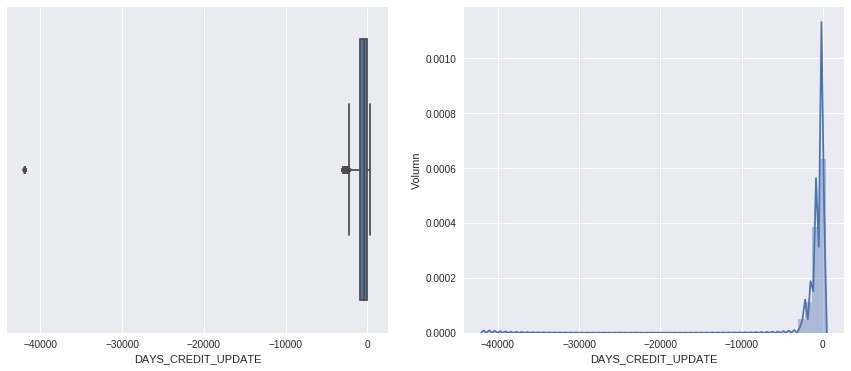

Column name: DAYS_ENDDATE_FACT
> No.outliner: 1 



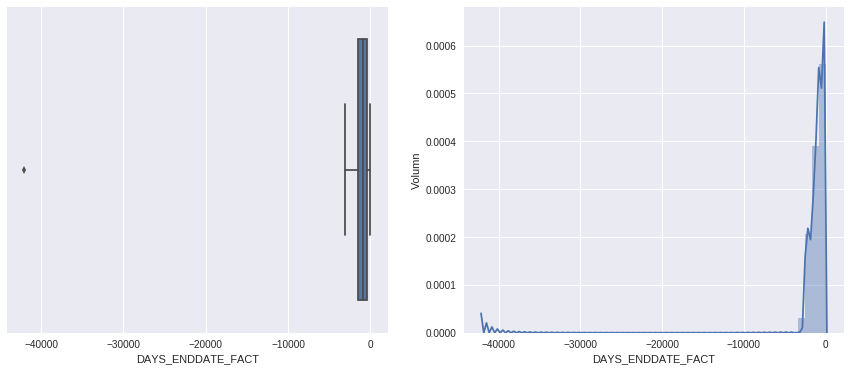

In [0]:
cols = ['CNT_CREDIT_PROLONG', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT',
        'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE', 'DAYS_ENDDATE_FACT']
# 'CNT_CREDIT_PROLONG', 'CREDIT_DAY_OVERDUE',
#  'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE', 'DAYS_ENDDATE_FACT',]
plot_continous(cols, None, df_bureau)

# Cleaning


In [0]:
def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping to generate new feature and then merging into origin df"""
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  


In [0]:
def get_bureau_balance(path, num_rows= None):  
  bb = pd.read_csv(os.path.join(path, 'bureau_balance.csv'), nrows= num_rows)
  bb, categorical_cols = one_hot_encoder(bb, nan_as_category= False)
  
  # Calculate rate for each category with decay
  bb_processed = bb.groupby('SK_ID_BUREAU')[categorical_cols].mean().reset_index()
  # Min, Max, Count and mean duration of payments (months)
  agg = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
  bb_processed = group_and_merge(bb, bb_processed, '', agg, 'SK_ID_BUREAU')
  del bb; gc.collect()
  return bb_processed

In [0]:
def get_bureau(path, num_rows= None):
    """ Process bureau.csv and bureau_balance.csv and return a pandas dataframe. """
    bureau = pd.read_csv(os.path.join(path, 'bureau.csv'), nrows= num_rows)
    # One-hot encoder
    bureau, categorical_cols = one_hot_encoder(bureau, nan_as_category= False)
    # Join bureau balance features
    bureau = bureau.merge(get_bureau_balance(path, num_rows), how='left', on='SK_ID_BUREAU')
    
    BUREAU_AGG = {
    'SK_ID_BUREAU': ['nunique'],
    'DAYS_CREDIT': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['mean'],

    'MONTHS_BALANCE_MEAN': ['mean', 'var'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum'],}
    
    # General loans aggregations
    agg_bureau = group(bureau, 'BUREAU_', BUREAU_AGG)    
    return agg_bureau

In [0]:
  bb = df_bureau_bal
  bb, categorical_cols = one_hot_encoder(bb, nan_as_category= False)
  
  # Calculate rate for each category with decay
  bb_processed = bb.groupby('SK_ID_BUREAU')[categorical_cols].mean().reset_index()
  # Min, Max, Count and mean duration of payments (months)
  agg = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
  bb_processed = group_and_merge(bb, bb_processed, '', agg, 'SK_ID_BUREAU')

In [0]:
    """ Process bureau.csv and bureau_balance.csv and return a pandas dataframe. """
    bureau = df_bureau
    # One-hot encoder
    bureau, categorical_cols = one_hot_encoder(bureau, nan_as_category= False)
    # Join bureau balance features
    bureau = bureau.merge(bb_processed, how='left', on='SK_ID_BUREAU')
    
    BUREAU_AGG = {
    'SK_ID_BUREAU': ['nunique'],
    'DAYS_CREDIT': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['mean'],

    'MONTHS_BALANCE_MEAN': ['mean', 'var'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum'],}
    
    # General loans aggregations
    agg_bureau = group(bureau, 'BUREAU_', BUREAU_AGG)  

In [0]:
bb_processed.head()

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_SIZE
0,5001709,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,-96,0,-48.0,97
1,5001710,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,-82,0,-41.0,83
2,5001711,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,-3,0,-1.5,4
3,5001712,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,-18,0,-9.0,19
4,5001713,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,-21,0,-10.5,22


In [0]:
agg_bureau.head()

,SK_ID_CURR,BUREAU_SK_ID_BUREAU_NUNIQUE,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,...,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MEAN,BUREAU_MONTHS_BALANCE_MEAN_MEAN,BUREAU_MONTHS_BALANCE_MEAN_VAR,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_SIZE_SUM
0,100001,7,-1572,-49,-735.000000,-1329.0,1778.0,NaN,NaN,378000.0,...,85240.928571,596686.5,0.0,0.0,0.0,3545.357143,-11.785714,64.404762,24.571429,172.0
1,100002,8,-1437,-103,-874.000000,-1072.0,780.0,5043.645,1681.029,450000.0,...,49156.200000,245781.0,0.0,0.0,0.0,0.000000,-21.875000,148.267857,13.750000,110.0
2,100003,4,-2586,-606,-1400.750000,-2434.0,1216.0,0.000,0.000,810000.0,...,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
3,100004,2,-1326,-408,-867.000000,-595.0,-382.0,0.000,0.000,94537.8,...,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
4,100005,3,-373,-62,-190.666667,-128.0,1324.0,0.000,0.000,568800.0,...,189469.500000,568408.5,0.0,0.0,0.0,1420.500000,-3.000000,7.000000,7.000000,21.0


In [0]:
agg_bureau.columns

Index(['SK_ID_CURR', 'BUREAU_SK_ID_BUREAU_NUNIQUE', 'BUREAU_DAYS_CREDIT_MIN',
       'BUREAU_DAYS_CREDIT_MAX', 'BUREAU_DAYS_CREDIT_MEAN',
       'BUREAU_DAYS_CREDIT_ENDDATE_MIN', 'BUREAU_DAYS_CREDIT_ENDDATE_MAX',
       'BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX',
       'BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN', 'BUREAU_AMT_CREDIT_SUM_MAX',
       'BUREAU_AMT_CREDIT_SUM_MEAN', 'BUREAU_AMT_CREDIT_SUM_SUM',
       'BUREAU_AMT_CREDIT_SUM_DEBT_MAX', 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN',
       'BUREAU_AMT_CREDIT_SUM_DEBT_SUM', 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX',
       'BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM', 'BUREAU_AMT_ANNUITY_MEAN',
       'BUREAU_MONTHS_BALANCE_MEAN_MEAN', 'BUREAU_MONTHS_BALANCE_MEAN_VAR',
       'BUREAU_MONTHS_BALANCE_SIZE_MEAN', 'BUREAU_MONTHS_BALANCE_SIZE_SUM'],
      dtype='object')

# FE
**bureau**:
- Data concerning client's previous credits from other financial institutions. 
- Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

**FE**
- Feature Selection is done
- Feature extraction
  - Generating features based on internal data
  - Generating features based on external data
- Domain knowledge features 
  - Transformation: Square, Square-Root, Power, Max, Min, Median, Mean, Var ...
  - Feature Calculation: Sum, Minus (Difference), Ratio (Division), Multiplication 
  - Groupby: Category feature, Time-based feature, Trending feature, Social Network feature.

In [0]:
""" 
'AMT_ANNUITY', tiền thường niên (thẻ)
'AMT_CREDIT_MAX_OVERDUE', khoảng quá hạn lớn nhất
'AMT_CREDIT_SUM',
'AMT_CREDIT_SUM_DEBT', tổng debt
'AMT_CREDIT_SUM_LIMIT', giới hạn
'AMT_CREDIT_SUM_OVERDUE', khoảng quá hạn

'CNT_CREDIT_PROLONG', số lần kéo dài hạn

'CREDIT_DAY_OVERDUE', ngày quá hạn
'DAYS_CREDIT', ngày bắt đầu tín dụng
'DAYS_CREDIT_ENDDATE', ngày trả hết
'DAYS_CREDIT_UPDATE', cập nhật
'DAYS_ENDDATE_FACT', ngày trả hết thực sự

'SK_ID_BUREAU', id code
'SK_ID_CURR' id code

'CREDIT_ACTIVE', loại tín dụng gồm closed, active, sold, bad dept
'CREDIT_CURRENCY', loại tiền 
'CREDIT_TYPE' loại thẻ

### bureau balance
'STATUS' mã trạng thái
'SK_ID_BUREAU'      
'MONTHS_BALANCE'
"""

In [0]:
# DOMAIN KNOWLEDGE FEATURES
# Credit duration and credit/account end date difference
bureau['CREDIT_DURATION'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT']
bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
# Credit to debt ratio and difference
bureau['CREDIT_TO_DURATION_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['CREDIT_DURATION']
bureau['DEBT_TO_DURATION_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['CREDIT_DURATION']

bureau['DEBT_PERCENTAGE'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

bureau['DEBT_TO_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM_LIMIT']
bureau['CREDIT_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_LIMIT']

bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
bureau['LIMIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM_LIMIT'] / bureau['AMT_ANNUITY']


In [0]:
def get_bureau_balance_3(path, num_rows= None):  
  bb = pd.read_csv(os.path.join(path, 'bureau_balance.csv'), nrows= num_rows)
  bb, categorical_cols = one_hot_encoder(bb, nan_as_category= False)
  
  # Calculate rate for each category with decay
  bb_processed = bb.groupby('SK_ID_BUREAU')[categorical_cols].mean().reset_index()
  # Min, Max, Count and mean duration of payments (months)
  agg = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
  bb_processed = group_and_merge(bb, bb_processed, '', agg, 'SK_ID_BUREAU')
  # Flag months with late payments (days past due)
  bb_processed['STATUS_12345'] = 0
  for i in range(1,6):
    bb_processed['STATUS_12345'] += bb_processed['STATUS_{}'.format(i)]
      
  del bb; gc.collect()
  return bb_processed

In [0]:
%%time
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

bb = get_bureau_balance_3(DATA_DIRECTORY, num_rows)

CPU times: user 19.8 s, sys: 707 ms, total: 20.5 s
Wall time: 21.7 s


In [0]:
statistical_analyzing(bb)

No. observations: 817395
No. features: 14


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
SK_ID_BUREAU,int64,817395 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),5.700076e+06,6.061126e+06,6.430106e+06,817395.0,6.842888e+06,6.022974e+06,5001709.0,500713.769281,6.547413e+06,6131794.0,6.658805e+06,5.764105e+06,6.781591e+06
STATUS_0,float64,2863 (0.35%),0 (0.00%),0 (0.00%),0 (0.00%),8.695652e-02,3.076923e-01,7.058824e-01,817395.0,1.000000e+00,3.994569e-01,0.0,0.347193,4.761905e-01,0.8,6.666667e-01,4.347826e-01,8.333333e-01
STATUS_1,float64,1187 (0.15%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,0.000000e+00,0.000000e+00,817395.0,1.000000e+00,1.116493e-02,0.0,0.046621,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
STATUS_2,float64,420 (0.05%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,0.000000e+00,0.000000e+00,817395.0,7.142857e-01,7.070824e-04,0.0,0.008025,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
STATUS_3,float64,249 (0.03%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,0.000000e+00,0.000000e+00,817395.0,4.000000e-01,2.469056e-04,0.0,0.003800,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
STATUS_4,float64,201 (0.02%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,0.000000e+00,0.000000e+00,817395.0,5.000000e-01,1.608014e-04,0.0,0.002889,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
STATUS_5,float64,1281 (0.16%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,0.000000e+00,0.000000e+00,817395.0,1.000000e+00,1.492400e-03,0.0,0.027131,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
STATUS_C,float64,2852 (0.35%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,2.857143e-01,7.640449e-01,817395.0,1.000000e+00,3.710395e-01,0.0,0.379741,5.238095e-01,0.0,0.000000e+00,5.652174e-01,0.000000e+00
STATUS_X,float64,2866 (0.35%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000e+00,2.439024e-02,3.043478e-01,817395.0,1.000000e+00,2.157315e-01,0.0,0.337008,0.000000e+00,0.2,3.333333e-01,0.000000e+00,1.666667e-01


In [0]:
bb.head()

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_SIZE,STATUS_12345
0,5001709,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,-96,0,-48.0,97,0.0
1,5001710,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,-82,0,-41.0,83,0.0
2,5001711,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,-3,0,-1.5,4,0.0
3,5001712,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,-18,0,-9.0,19,0.0
4,5001713,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,-21,0,-10.5,22,0.0


In [0]:
# [f for f in bb.columns if 'STATUS_' in f]

In [0]:
""" TIME BASE """  
# Aggregations for last x months
for months in [24, 48]:    
  b_prev_id = bureau[bureau['MONTHS_BALANCE_SIZE'] >= -months]['SK_ID_BUREAU'].unique()
  b_recent = bureau[bureau['SK_ID_BUREAU'].isin(pos_prev_id)]
  prefix = 'BUREAU_LAST{}MBLANCE_'.format(months)
  agg_bureau = group_and_merge(b_recent, agg_bureau, prefix,  
                             {'CREDIT_DEBT_RATIO': ['mean'],
                              'DEBT_CREDIT_DIFF': ['mean'],
                              'DEBT_TO_LIMIT_RATIO': ['mean'],  
                              'CREDIT_LIMIT_RATIO': ['mean'],
                              'CREDIT_TO_ANNUITY_RATIO': ['mean'],
                              'LIMIT_TO_ANNUITY_RATIO': ['mean'],
                              'DAYS_CREDIT_ENDDATE': ['max'],})
  del b_recent; gc.collect()  
# Time based aggregations: last x months
for time_frame in [12, 24, 48]:
    prefix = "BUREAU_LAST{}M_".format(time_frame)
    time_frame_df = bureau[bureau['DAYS_CREDIT'] >= -30*time_frame]
    BUREAU_TIME_AGG = {'CREDIT_DEBT_RATIO': ['mean'],                       
                       'DEBT_CREDIT_DIFF': ['mean'],
                       'DEBT_TO_LIMIT_RATIO': ['mean'],  
                       'CREDIT_LIMIT_RATIO': ['mean'],
                       'CREDIT_TO_ANNUITY_RATIO': ['mean'],
                       'LIMIT_TO_ANNUITY_RATIO': ['mean'],
                       'DAYS_CREDIT_ENDDATE': ['max'],}
    agg_bureau = group_and_merge(time_frame_df, agg_bureau, prefix, BUREAU_TIME_AGG)
    del time_frame_df; gc.collect()
  

In [0]:
 """ CATEGORIES """
    # Active and closed loans aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    BUREAU_ACTIVE_AGG = {        
        'DAYS_CREDIT': ['max', 'mean'],
        'DAYS_CREDIT_ENDDATE': ['max'],
        'DAYS_CREDIT_UPDATE': ['max'],
        'ENDDATE_DIF': ['mean'], 
        'CREDIT_DEBT_RATIO': ['mean'],        
        'DEBT_CREDIT_DIFF': ['mean'],
        'DEBT_TO_LIMIT_RATIO': ['mean'],  
        'CREDIT_LIMIT_RATIO': ['mean'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean'],
        'LIMIT_TO_ANNUITY_RATIO': ['mean'],
        'AMT_CREDIT_SUM': ['mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
    agg_bureau = group_and_merge(active,agg_bureau,'BUREAU_ACTIVE_',BUREAU_ACTIVE_AGG)
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    BUREAU_CLOSED_AGG = {
        'DAYS_CREDIT': ['max', 'var'],
        'DAYS_CREDIT_ENDDATE': ['max'],
        'DAYS_CREDIT_UPDATE': ['max'],
        'ENDDATE_DIF': ['mean'], 
        'CREDIT_DEBT_RATIO': ['mean'],        
        'DEBT_CREDIT_DIFF': ['mean'],
        'DEBT_TO_LIMIT_RATIO': ['mean'],  
        'CREDIT_LIMIT_RATIO': ['mean'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean'],
        'LIMIT_TO_ANNUITY_RATIO': ['mean'],        
        'AMT_CREDIT_SUM': ['mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],     }
    agg_bureau = group_and_merge(closed,agg_bureau,'BUREAU_CLOSED_',BUREAU_CLOSED_AGG)
    del active, closed; gc.collect()
    
    # Aggregations for the main loan types
    for credit_type in ['Consumer credit', 'Credit card', 'Mortgage', 'Car loan', 'Microloan']:
      type_df = bureau[bureau['CREDIT_TYPE_' + credit_type] == 1]
      prefix = 'BUREAU_' + credit_type.split(' ')[0].upper() + '_'        
      BUREAU_LOAN_TYPE_AGG = {
          'DAYS_CREDIT': ['mean', 'max'],
          'DAYS_CREDIT_ENDDATE': ['max'],
          'AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'],
          'AMT_CREDIT_SUM': ['mean', 'max'],
          'AMT_CREDIT_SUM_DEBT': ['mean', 'max'],
          'CREDIT_DEBT_RATIO': ['mean'],
          'DEBT_CREDIT_DIFF': ['mean'],
          'DEBT_TO_LIMIT_RATIO': ['mean'],  
          'CREDIT_LIMIT_RATIO': ['mean'],
          'CREDIT_TO_ANNUITY_RATIO': ['mean'],
          'LIMIT_TO_ANNUITY_RATIO': ['mean'], 
          'AMT_CREDIT_SUM': ['mean', 'sum'],
          'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
          'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],       }
      agg_bureau = group_and_merge(type_df, agg_bureau, prefix, BUREAU_LOAN_TYPE_AGG)
      del type_df; gc.collect()

    # Last loan max overdue
    sort_bureau = bureau.sort_values(by=['DAYS_CREDIT'])
    gr = sort_bureau.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].last().reset_index()
    gr.rename({'AMT_CREDIT_MAX_OVERDUE': 'BUREAU_LAST_LOAN_MAX_OVERDUE'}, inplace=True)
    agg_bureau = agg_bureau.merge(gr, on='SK_ID_CURR', how='left')
    # Ratios: total debt/total credit and active loans debt/ active loans credit
    agg_bureau['BUREAU_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_AMT_CREDIT_SUM_DEBT_SUM']/
                                             agg_bureau['BUREAU_AMT_CREDIT_SUM_SUM'])
    agg_bureau['BUREAU_ACTIVE_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM']/
                                                    agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_SUM'])

In [0]:
def get_bureau_3(path, num_rows= None):
    """ Process bureau.csv and bureau_balance.csv and return a pandas dataframe. """
    bureau = pd.read_csv(os.path.join(path, 'bureau.csv'), nrows= num_rows)
    
    # DOMAIN KNOWLEDGE FEATURES
    # Credit duration and credit/account end date difference
    bureau['CREDIT_DURATION'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT']
    bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    # Credit to debt ratio and difference
    bureau['CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
    bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

    bureau['DEBT_TO_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM_LIMIT']
    bureau['CREDIT_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_LIMIT']

    bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
    bureau['LIMIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM_LIMIT'] / bureau['AMT_ANNUITY']

    
    # One-hot encoder
    bureau, categorical_cols = one_hot_encoder(bureau, nan_as_category= False)
    
    # Join bureau balance features
    bb = get_bureau_balance_3(path, num_rows)
    categorical_cols = categorical_cols + [f for f in bb.columns if 'STATUS_' in f]
    bureau = bureau.merge(bb, how='left', on='SK_ID_BUREAU')
    
    BUREAU_AGG = {                
        'SK_ID_BUREAU': ['nunique'],
        'DAYS_CREDIT': ['min', 'max', 'mean'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max'],
        'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
        'AMT_ANNUITY': ['mean', 'sum'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'MONTHS_BALANCE_MEAN': ['mean', 'var'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
        # new features
        'CREDIT_DURATION': ['min', 'max'],
        'ENDDATE_DIF': ['min', 'max'],
        'CREDIT_DEBT_RATIO': ['mean'],
        'DEBT_CREDIT_DIFF': ['max', 'mean', 'sum'],
        'DEBT_TO_LIMIT_RATIO': ['mean'],
        'CREDIT_LIMIT_RATIO': ['mean'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean'],
        'LIMIT_TO_ANNUITY_RATIO': ['mean'], }
    
    # Aggregate by SK_ID_CURR
    categorical_agg = {key: ['mean'] for key in categorical_cols}
    # General loans aggregations
    agg_bureau = group(bureau, 'BUREAU_',  {**BUREAU_AGG, **categorical_agg}) 
    
    # Aggregations for last x months
    for months in [12, 24, 48]:    
      b_prev_id = bureau[bureau['MONTHS_BALANCE_SIZE'] >= -months]['SK_ID_BUREAU'].unique()
      b_recent = bureau[bureau['SK_ID_BUREAU'].isin(b_prev_id)]
      prefix = 'BUREAU_LAST{}MBLANCE_'.format(months)
      BUREAU_MBALANCE_AGG = {
          'AMT_CREDIT_SUM': ['mean', 'sum'],
          'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
          'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'], 
          'CREDIT_DEBT_RATIO': ['mean'], 
          'DEBT_CREDIT_DIFF': ['mean'],
          'DEBT_TO_LIMIT_RATIO': ['mean'], 
          'CREDIT_LIMIT_RATIO': ['mean'],
          'CREDIT_TO_ANNUITY_RATIO': ['mean'],
          'LIMIT_TO_ANNUITY_RATIO': ['mean'],
          'DAYS_CREDIT_ENDDATE': ['max'],}
      agg_bureau = group_and_merge(b_recent, agg_bureau, prefix,BUREAU_MBALANCE_AGG)
      del b_recent; gc.collect()  
    # Time based aggregations: last x months
    for time_frame in [12, 24, 48]:
      prefix = "BUREAU_LAST{}M_".format(time_frame)
      time_frame_df = bureau[bureau['DAYS_CREDIT'] >= -30*time_frame]
      BUREAU_TIME_AGG = {
          'AMT_CREDIT_SUM': ['mean', 'sum'],
          'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
          'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'], 
          'CREDIT_DEBT_RATIO': ['mean'], 
          'DEBT_CREDIT_DIFF': ['mean'],
          'DEBT_TO_LIMIT_RATIO': ['mean'], 
          'CREDIT_LIMIT_RATIO': ['mean'],
          'CREDIT_TO_ANNUITY_RATIO': ['mean'],
          'LIMIT_TO_ANNUITY_RATIO': ['mean'],
          'DAYS_CREDIT_ENDDATE': ['max'],}      
      agg_bureau = group_and_merge(time_frame_df, agg_bureau, prefix, BUREAU_TIME_AGG)
      del time_frame_df; gc.collect()
    
    """ CATEGORIES """
    # Active and closed loans aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    BUREAU_ACTIVE_AGG = {        
        'DAYS_CREDIT': ['max', 'mean'],
        'DAYS_CREDIT_ENDDATE': ['max'],
        'DAYS_CREDIT_UPDATE': ['max'],
        'ENDDATE_DIF': ['mean'], 
        'CREDIT_DEBT_RATIO': ['mean'],        
        'DEBT_CREDIT_DIFF': ['mean'],
        'DEBT_TO_LIMIT_RATIO': ['mean'],  
        'CREDIT_LIMIT_RATIO': ['mean'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean'],
        'LIMIT_TO_ANNUITY_RATIO': ['mean'],
        'AMT_CREDIT_SUM': ['mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
    agg_bureau = group_and_merge(active,agg_bureau,'BUREAU_ACTIVE_',BUREAU_ACTIVE_AGG)
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    BUREAU_CLOSED_AGG = {
        'DAYS_CREDIT': ['max', 'var'],
        'DAYS_CREDIT_ENDDATE': ['max'],
        'DAYS_CREDIT_UPDATE': ['max'],
        'ENDDATE_DIF': ['mean'], 
        'CREDIT_DEBT_RATIO': ['mean'],        
        'DEBT_CREDIT_DIFF': ['mean'],
        'DEBT_TO_LIMIT_RATIO': ['mean'],  
        'CREDIT_LIMIT_RATIO': ['mean'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean'],
        'LIMIT_TO_ANNUITY_RATIO': ['mean'],        
        'AMT_CREDIT_SUM': ['mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],     }
    agg_bureau = group_and_merge(closed,agg_bureau,'BUREAU_CLOSED_',BUREAU_CLOSED_AGG)
    del active, closed; gc.collect()
    
    # Aggregations for the main loan types
    for credit_type in ['Consumer credit', 'Credit card', 'Mortgage', 'Car loan', 'Microloan']:
      type_df = bureau[bureau['CREDIT_TYPE_' + credit_type] == 1]
      prefix = 'BUREAU_' + credit_type.split(' ')[0].upper() + '_'        
      BUREAU_LOAN_TYPE_AGG = {
          'DAYS_CREDIT': ['mean', 'max'],
          'DAYS_CREDIT_ENDDATE': ['max'],
          'AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'],
          'AMT_CREDIT_SUM': ['mean', 'max'],
          'AMT_CREDIT_SUM_DEBT': ['mean', 'max'],
          'CREDIT_DEBT_RATIO': ['mean'],
          'DEBT_CREDIT_DIFF': ['mean'],
          'DEBT_TO_LIMIT_RATIO': ['mean'],  
          'CREDIT_LIMIT_RATIO': ['mean'],
          'CREDIT_TO_ANNUITY_RATIO': ['mean'],
          'LIMIT_TO_ANNUITY_RATIO': ['mean'], 
          'AMT_CREDIT_SUM': ['mean', 'sum'],
          'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
          'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],       }
      agg_bureau = group_and_merge(type_df, agg_bureau, prefix, BUREAU_LOAN_TYPE_AGG)
      del type_df; gc.collect()

    # Last loan max overdue
    sort_bureau = bureau.sort_values(by=['DAYS_CREDIT'])
    gr = sort_bureau.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].last().reset_index()
    gr.rename({'AMT_CREDIT_MAX_OVERDUE': 'BUREAU_LAST_LOAN_MAX_OVERDUE'}, inplace=True)
    agg_bureau = agg_bureau.merge(gr, on='SK_ID_CURR', how='left')
    # Ratios: total debt/total credit and active loans debt/ active loans credit
    agg_bureau['BUREAU_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_AMT_CREDIT_SUM_DEBT_SUM']/
                                             agg_bureau['BUREAU_AMT_CREDIT_SUM_SUM'])
    agg_bureau['BUREAU_ACTIVE_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM']/
                                                    agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_SUM'])
    
    
    return agg_bureau

In [0]:
def get_bureau_balance_3(path, num_rows= None):  
  bb = pd.read_csv(os.path.join(path, 'bureau_balance.csv'), nrows= num_rows)
  # One-hot encoder  
  bb, categorical_cols = one_hot_encoder(bb, nan_as_category= False)  
  # Calculate rate for each category with decay
  bb_processed = bb.groupby('SK_ID_BUREAU')[categorical_cols].mean().reset_index()
  # Min, Max, Count and mean duration of payments (months)
  agg = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
  bb_processed = group_and_merge(bb, bb_processed, '', agg, 'SK_ID_BUREAU')
  # Flag months with late payments (days past due)
  bb_processed['STATUS_12345'] = 0
  for i in range(1,6):
    bb_processed['STATUS_12345'] += bb_processed['STATUS_{}'.format(i)]      
  del bb; gc.collect()
  return bb_processed

def get_bureau_3(path, num_rows= None):
  """ Process bureau.csv and bureau_balance.csv and return a pandas dataframe. """
  bureau = pd.read_csv(os.path.join(path, 'bureau.csv'), nrows= num_rows)

  # DOMAIN KNOWLEDGE FEATURES
  # Credit duration and credit/account end date difference
  bureau['CREDIT_DURATION'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT']
  bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
  # Credit to debt ratio and difference
  bureau['CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
  bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

  bureau['DEBT_TO_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM_LIMIT']
  bureau['CREDIT_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_LIMIT']

  bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
  bureau['LIMIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM_LIMIT'] / bureau['AMT_ANNUITY']


  # One-hot encoder
  #ohe_columns = ['CREDIT_ACTIVE']
  bureau, categorical_cols = one_hot_encoder(bureau, nan_as_category= False)

  # Join bureau balance features
  bb = get_bureau_balance_3(path, num_rows)
  categorical_cols = categorical_cols + ['STATUS_C','STATUS_0','STATUS_X','STATUS_12345']
#   + [f for f in bb.columns if 'STATUS_' in f]
  bureau = bureau.merge(bb, how='left', on='SK_ID_BUREAU')

  BUREAU_AGG = {                
      'SK_ID_BUREAU': ['nunique'],
      'DAYS_CREDIT': ['min', 'max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['min', 'max'],
      'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
      'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
      'AMT_ANNUITY': ['mean', 'sum'],
      'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
      'MONTHS_BALANCE_MEAN': ['mean', 'var'],
      'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
      # new features
      'CREDIT_DURATION': ['min', 'max'],
      'ENDDATE_DIF': ['min', 'max'],
      'CREDIT_DEBT_RATIO': ['mean'],
      'DEBT_CREDIT_DIFF': ['max', 'mean', 'sum'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],
      'CREDIT_LIMIT_RATIO': ['mean'],
      'CREDIT_TO_ANNUITY_RATIO': ['mean'],
      'LIMIT_TO_ANNUITY_RATIO': ['mean'], }

  # Aggregate by SK_ID_CURR
  categorical_agg = {key: ['mean'] for key in categorical_cols}
  # General loans aggregations
  agg_bureau = group(bureau, 'BUREAU_',  {**BUREAU_AGG, **categorical_agg}) 

#   # Aggregations for last x months
#   for months in [12, 24]:    
#     b_prev_id = bureau[bureau['MONTHS_BALANCE_SIZE'] >= -months]['SK_ID_BUREAU'].unique()
#     b_recent = bureau[bureau['SK_ID_BUREAU'].isin(b_prev_id)]
#     prefix = 'BUREAU_LAST{}MBLANCE_'.format(months)
#     BUREAU_MBALANCE_AGG = {
#         'AMT_CREDIT_SUM': ['mean', 'sum'],
#         'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
#         'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'], 
#         'CREDIT_DEBT_RATIO': ['mean'], 
#         'DEBT_CREDIT_DIFF': ['mean'],
#         'DEBT_TO_LIMIT_RATIO': ['mean'], 
#         'DAYS_CREDIT': ['min', 'max', 'mean'],
#         'DAYS_CREDIT_ENDDATE': ['max'],} 
#     agg_bureau = group_and_merge(b_recent, agg_bureau, prefix,BUREAU_MBALANCE_AGG)
#     del b_recent; gc.collect()  
  # Time based aggregations: last x months
  for time_frame in [12, 24, 48]:
    prefix = "BUREAU_LAST{}M_".format(time_frame)
    time_frame_df = bureau[bureau['DAYS_CREDIT'] >= -30*time_frame]
    BUREAU_TIME_AGG = {
        'AMT_CREDIT_SUM': ['mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'], 
        'CREDIT_DEBT_RATIO': ['mean'], 
        'DEBT_CREDIT_DIFF': ['mean'],
        'DEBT_TO_LIMIT_RATIO': ['mean'], 
        'DAYS_CREDIT': ['min', 'max', 'mean'],
        'DAYS_CREDIT_ENDDATE': ['max'],}      
    agg_bureau = group_and_merge(time_frame_df, agg_bureau, prefix, BUREAU_TIME_AGG)
    del time_frame_df; gc.collect()

  """ CATEGORIES """
  # Active and closed loans aggregations
  active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
  BUREAU_ACTIVE_AGG = {        
      'DAYS_CREDIT': ['max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['max'],
      'DAYS_CREDIT_UPDATE': ['max'],
      'ENDDATE_DIF': ['mean'], 
      'CREDIT_DEBT_RATIO': ['mean'],        
      'DEBT_CREDIT_DIFF': ['mean'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],  
      'AMT_CREDIT_SUM': ['mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
  agg_bureau = group_and_merge(active,agg_bureau,'BUREAU_ACTIVE_',BUREAU_ACTIVE_AGG)
  closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
  BUREAU_CLOSED_AGG = {
      'DAYS_CREDIT': ['max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['max'],
      'DAYS_CREDIT_UPDATE': ['max'],
      'ENDDATE_DIF': ['mean'], 
      'CREDIT_DEBT_RATIO': ['mean'],        
      'DEBT_CREDIT_DIFF': ['mean'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],  
      'AMT_CREDIT_SUM': ['mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
  agg_bureau = group_and_merge(closed,agg_bureau,'BUREAU_CLOSED_',BUREAU_CLOSED_AGG)
  del active, closed; gc.collect()

  # Aggregations for the main loan types
  for credit_type in ['Consumer credit', 'Credit card']: #, 'Mortgage', 'Car loan', 'Microloan']:
    type_df = bureau[bureau['CREDIT_TYPE_' + credit_type] == 1]
    prefix = 'BUREAU_' + credit_type.split(' ')[0].upper() + '_'        
    BUREAU_LOAN_TYPE_AGG = {
      'DAYS_CREDIT': ['max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['max'],
      'DAYS_CREDIT_UPDATE': ['max'],
      'ENDDATE_DIF': ['mean'], 
      'CREDIT_DEBT_RATIO': ['mean'],        
      'DEBT_CREDIT_DIFF': ['mean'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],  
      'AMT_CREDIT_SUM': ['mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
    agg_bureau = group_and_merge(type_df, agg_bureau, prefix, BUREAU_LOAN_TYPE_AGG)
    del type_df; gc.collect()

  # Last loan max overdue
  sort_bureau = bureau.sort_values(by=['DAYS_CREDIT'])
  gr = sort_bureau.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].last().reset_index()
  gr.rename({'AMT_CREDIT_MAX_OVERDUE': 'BUREAU_LAST_LOAN_MAX_OVERDUE'}, inplace=True)
  agg_bureau = agg_bureau.merge(gr, on='SK_ID_CURR', how='left')

  # Ratios: total debt/total credit and active loans debt/ active loans credit
  agg_bureau['BUREAU_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_AMT_CREDIT_SUM_DEBT_SUM']/
                                           agg_bureau['BUREAU_AMT_CREDIT_SUM_SUM'])
  agg_bureau['BUREAU_ACTIVE_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM']/
                                                  agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_SUM'])
  # agg_bureau = drop_bureau_cols(agg_bureau)  
  return agg_bureau

def drop_bureau_cols(df):
    """ Drop features based on permutation feature importance. """
    drop_list = ['BUREAU_CREDIT_ACTIVE_Bad debt_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 1_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 2_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 3_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 4_MEAN',
       'BUREAU_CREDIT_TYPE_Another type of loan_MEAN',
       'BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN',
       'BUREAU_CREDIT_TYPE_Interbank credit_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for business development_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for working capital replenishment_MEAN',
       'BUREAU_CREDIT_TYPE_Mobile operator loan_MEAN',
       'BUREAU_CREDIT_TYPE_Real estate loan_MEAN',
       'BUREAU_CREDIT_TYPE_Unknown type of loan_MEAN',
       'BUREAU_ACTIVE_ENDDATE_DIF_MEAN',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_OVERDUE_SUM',
       'BUREAU_CONSUMER_DEBT_TO_LIMIT_RATIO_MEAN',]
    df.drop(drop_list, axis=1, inplace=True)
    return df

In [0]:
%%time
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

bureau = get_bureau_3(DATA_DIRECTORY, num_rows)

In [0]:
bureau.shape

(305811, 163)

## last update

In [0]:
def get_bureau_balance_3(path, num_rows= None):  
  bb = pd.read_csv(os.path.join(path, 'bureau_balance.csv'), nrows= num_rows)
  # One-hot encoder  
  bb, categorical_cols = one_hot_encoder(bb, nan_as_category= False)  
  # Calculate rate for each category with decay
  bb_processed = bb.groupby('SK_ID_BUREAU')[categorical_cols].mean().reset_index()
  # Min, Max, Count and mean duration of payments (months)
  agg = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
  bb_processed = group_and_merge(bb, bb_processed, '', agg, 'SK_ID_BUREAU')
  # Flag months with late payments (days past due)
  bb_processed['STATUS_12345'] = 0
  for i in range(1,6):
    bb_processed['STATUS_12345'] += bb_processed['STATUS_{}'.format(i)]      
  del bb; gc.collect()
  return bb_processed

def get_bureau_3(path, num_rows= None):
  """ Process bureau.csv and bureau_balance.csv and return a pandas dataframe. """
  bureau = pd.read_csv(os.path.join(path, 'bureau.csv'), nrows= num_rows)

  # DOMAIN KNOWLEDGE FEATURES
  # Credit duration and credit/account end date difference
  bureau['CREDIT_DURATION'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT']
  bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
  # Credit to debt ratio and difference
  bureau['CREDIT_TO_DURATION_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['CREDIT_DURATION']
  bureau['DEBT_TO_DURATION_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['CREDIT_DURATION']
  bureau['DEBT_PERCENTAGE'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
  bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
  bureau['DEBT_TO_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM_LIMIT']
  bureau['CREDIT_LIMIT_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_LIMIT']
  bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
  bureau['LIMIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM_LIMIT'] / bureau['AMT_ANNUITY']

  # One-hot encoder
  #ohe_columns = ['CREDIT_ACTIVE']
  bureau, categorical_cols = one_hot_encoder(bureau, nan_as_category= False)

  # Join bureau balance features
  bb = get_bureau_balance_3(path, num_rows)
  categorical_cols = categorical_cols + ['STATUS_C','STATUS_0','STATUS_X','STATUS_12345']
#   + [f for f in bb.columns if 'STATUS_' in f]
  bureau = bureau.merge(bb, how='left', on='SK_ID_BUREAU')

  BUREAU_AGG = {                
      'SK_ID_BUREAU': ['nunique'],
      'DAYS_CREDIT': ['min', 'max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['min', 'max'],
      'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
      'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
      'AMT_ANNUITY': ['mean', 'sum'],
      'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
      'MONTHS_BALANCE_MEAN': ['mean', 'var'],
      'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
      # new features
      'CREDIT_DURATION': ['min', 'max'],
      'ENDDATE_DIF': ['min', 'max'],
      'CREDIT_DEBT_RATIO': ['mean'],
      'DEBT_CREDIT_DIFF': ['max', 'mean', 'sum'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],
      'CREDIT_LIMIT_RATIO': ['mean'],
      'CREDIT_TO_ANNUITY_RATIO': ['mean'],
      'LIMIT_TO_ANNUITY_RATIO': ['mean'], }

  # Aggregate by SK_ID_CURR
  categorical_agg = {key: ['mean'] for key in categorical_cols}
  # General loans aggregations
  agg_bureau = group(bureau, 'BUREAU_',  {**BUREAU_AGG, **categorical_agg}) 

  # Time based aggregations: last x months
  for time_frame in [12, 24, 48]:
    prefix = "BUREAU_LAST{}M_".format(time_frame)
    time_frame_df = bureau[bureau['DAYS_CREDIT'] >= -30*time_frame]
    BUREAU_TIME_AGG = {
        'AMT_CREDIT_SUM': ['mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'], 
        'CREDIT_DEBT_RATIO': ['mean'], 
        'DEBT_CREDIT_DIFF': ['mean'],
        'DEBT_TO_LIMIT_RATIO': ['mean'], 
        'DAYS_CREDIT': ['min', 'max', 'mean'],
        'DAYS_CREDIT_ENDDATE': ['max'],}      
    agg_bureau = group_and_merge(time_frame_df, agg_bureau, prefix, BUREAU_TIME_AGG)
    del time_frame_df; gc.collect()

  """ CATEGORIES """
  # Active and closed loans aggregations
  active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
  BUREAU_ACTIVE_AGG = {        
      'DAYS_CREDIT': ['max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['max'],
      'DAYS_CREDIT_UPDATE': ['max'],
      'ENDDATE_DIF': ['mean'], 
      'CREDIT_DEBT_RATIO': ['mean'],        
      'DEBT_CREDIT_DIFF': ['mean'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],  
      'AMT_CREDIT_SUM': ['mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
  agg_bureau = group_and_merge(active,agg_bureau,'BUREAU_ACTIVE_',BUREAU_ACTIVE_AGG)
  closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
  BUREAU_CLOSED_AGG = {
      'DAYS_CREDIT': ['max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['max'],
      'DAYS_CREDIT_UPDATE': ['max'],
      'ENDDATE_DIF': ['mean'], 
      'CREDIT_DEBT_RATIO': ['mean'],        
      'DEBT_CREDIT_DIFF': ['mean'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],  
      'AMT_CREDIT_SUM': ['mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
  agg_bureau = group_and_merge(closed,agg_bureau,'BUREAU_CLOSED_',BUREAU_CLOSED_AGG)
  del active, closed; gc.collect()

  # Aggregations for the main loan types
  for credit_type in ['Consumer credit', 'Credit card']: #, 'Mortgage', 'Car loan', 'Microloan']:
    type_df = bureau[bureau['CREDIT_TYPE_' + credit_type] == 1]
    prefix = 'BUREAU_' + credit_type.split(' ')[0].upper() + '_'        
    BUREAU_LOAN_TYPE_AGG = {
      'DAYS_CREDIT': ['max', 'mean'],
      'DAYS_CREDIT_ENDDATE': ['max'],
      'DAYS_CREDIT_UPDATE': ['max'],
      'ENDDATE_DIF': ['mean'], 
      'CREDIT_DEBT_RATIO': ['mean'],        
      'DEBT_CREDIT_DIFF': ['mean'],
      'DEBT_TO_LIMIT_RATIO': ['mean'],  
      'AMT_CREDIT_SUM': ['mean', 'sum'],
      'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
      'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],    }
    agg_bureau = group_and_merge(type_df, agg_bureau, prefix, BUREAU_LOAN_TYPE_AGG)
    del type_df; gc.collect()

  # Last loan max overdue
  sort_bureau = bureau.sort_values(by=['DAYS_CREDIT'])
  gr = sort_bureau.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].last().reset_index()
  gr.rename({'AMT_CREDIT_MAX_OVERDUE': 'BUREAU_LAST_LOAN_MAX_OVERDUE'}, inplace=True)
  agg_bureau = agg_bureau.merge(gr, on='SK_ID_CURR', how='left')

  # Ratios: total debt/total credit and active loans debt/ active loans credit
  agg_bureau['BUREAU_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_AMT_CREDIT_SUM_DEBT_SUM']/
                                           agg_bureau['BUREAU_AMT_CREDIT_SUM_SUM'])
  agg_bureau['BUREAU_ACTIVE_DEBT_OVER_CREDIT'] = (agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM']/
                                                  agg_bureau['BUREAU_ACTIVE_AMT_CREDIT_SUM_SUM'])
  # agg_bureau = drop_bureau_cols(agg_bureau)  
  return agg_bureau

def drop_bureau_cols(df):
    """ Drop features based on permutation feature importance. """
    drop_list = ['BUREAU_CREDIT_ACTIVE_Bad debt_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 1_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 2_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 3_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 4_MEAN',
       'BUREAU_CREDIT_TYPE_Another type of loan_MEAN',
       'BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN',
       'BUREAU_CREDIT_TYPE_Interbank credit_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for business development_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for working capital replenishment_MEAN',
       'BUREAU_CREDIT_TYPE_Mobile operator loan_MEAN',
       'BUREAU_CREDIT_TYPE_Real estate loan_MEAN',
       'BUREAU_CREDIT_TYPE_Unknown type of loan_MEAN',
       'BUREAU_ACTIVE_ENDDATE_DIF_MEAN',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_OVERDUE_SUM',
       'BUREAU_CONSUMER_DEBT_TO_LIMIT_RATIO_MEAN',]
    df.drop(drop_list, axis=1, inplace=True)
    return df

# Check DF

In [0]:
df.shape

(356250, 285)

In [0]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 BUREAU_MONTHS_BALANCE_MEAN_MEAN             0.076424
BUREAU_CREDIT_DAYS_CREDIT_MAX               0.076610
BUREAU_CONSUMER_DAYS_CREDIT_MEAN            0.077181
BUREAU_CREDIT_ACTIVE_Active_MEAN            0.077344
DAYS_BIRTH                                  0.078235
BUREAU_LAST48M_DAYS_CREDIT_MEAN             0.080194
BUREAU_CREDIT_DAYS_CREDIT_MEAN              0.082856
BUREAU_DAYS_CREDIT_MEAN                     0.089718
TARGET                                      1.000000
BUREAU_CONSUMER_DEBT_TO_LIMIT_RATIO_MEAN         NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                          -0.178906
EXT_SOURCE_2                          -0.160452
EXT_SOURCE_1                          -0.155319
BUREAU_MONTHS_BALANCE_SIZE_MEAN       -0.080193
BUREAU_CREDIT_ACTIVE_Closed_MEAN      -0.079357
AGE_RANGE                             -0.074074
BUREAU_CREDIT_DEBT_CREDIT_DIFF_MEAN   -0.061020
NAME_INCOME_TYPE                      -0.05701


# Test

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
""" FEATURE ENGINEERING FUNCTIONS"""        
def do_mean(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_median(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_std(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_sum(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df
  
def label_encoder(df, categorical_columns=None):
  """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
  if not categorical_columns:
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  for col in categorical_columns:
      df[col], uniques = pd.factorize(df[col])
  return df, categorical_columns


def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  


In [0]:
# Application table
def get_age_label(days_birth):
  """ Return the age group label (int). """
  age_years = -days_birth / 365
  if age_years < 27: return 1
  elif age_years < 40: return 2
  elif age_years < 50: return 3
  elif age_years < 65: return 4
  elif age_years < 99: return 5
  else: return 0

def get_apply_train_test_2(path, num_rows = None):
  """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
  train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
  test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
  df = train.append(test)
  del train, test; gc.collect()

  # Data cleaning
  df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
  df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
  df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
  df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

  df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value

  # Categorical age - based on target=1 plot
  df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x)) 

  # Encode categorical features (LabelEncoder)
  df, le_encoded_cols = label_encoder(df, None)
  return df


## model 1

In [0]:
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    bureau = get_bureau(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, bureau, on='SK_ID_CURR', how='left')
    print("bureau shape: ", bureau.shape)
    print("Final dataframe shape: ", df.shape)
    del bureau; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 13s
bureau shape:  (305811, 23)
Final dataframe shape:  (356250, 145)
Credit card dataframe - done in 43s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_1 = train['TARGET']
X_1 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_1 = xgb.XGBClassifier(**param_int)
xgb_model_1.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_1.evals_result()
evals_result



Train/valid shape: (356250, 145), test shape: (48744, 145)
[0]	validation_0-auc:0.675364	validation_1-auc:0.672234	validation_2-auc:0.676128
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.7428	validation_1-auc:0.738117	validation_2-auc:0.737442
[200]	validation_0-auc:0.758225	validation_1-auc:0.748834	validation_2-auc:0.748611
[300]	validation_0-auc:0.769713	validation_1-auc:0.755133	validation_2-auc:0.755627
[400]	validation_0-auc:0.777266	validation_1-auc:0.758238	validation_2-auc:0.759091
[499]	validation_0-auc:0.783648	validation_1-auc:0.760328	validation_2-auc:0.76136
CPU times: user 6min 3s, sys: 7 s, total: 6min 10s
Wall time: 3min 16s


## model 2

In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    bureau = get_bureau_3(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, bureau, on='SK_ID_CURR', how='left')
    print("bureau shape: ", bureau.shape)
    print("Final dataframe shape: ", df.shape)
    #del bureau; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 13s
bureau shape:  (305811, 163)
Final dataframe shape:  (356250, 285)
Credit card dataframe - done in 54s


In [0]:
bureau.shape

(305811, 207)

In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_2.evals_result()
evals_result



Train/valid shape: (356250, 285), test shape: (48744, 285)
[0]	validation_0-auc:0.680953	validation_1-auc:0.679697	validation_2-auc:0.682355
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.746778	validation_1-auc:0.740332	validation_2-auc:0.740441
[200]	validation_0-auc:0.764629	validation_1-auc:0.752258	validation_2-auc:0.752308
[300]	validation_0-auc:0.777536	validation_1-auc:0.759434	validation_2-auc:0.75965
[400]	validation_0-auc:0.786227	validation_1-auc:0.763597	validation_2-auc:0.763478
[499]	validation_0-auc:0.793104	validation_1-auc:0.76571	validation_2-auc:0.765801
CPU times: user 11min 14s, sys: 8.42 s, total: 11min 22s
Wall time: 6min 1s


In [0]:
# Plotting importance features
feature_names = X_2.columns
imp = pd.DataFrame(index=feature_names)
imp['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

feature_names = X_1.columns
imp['model_1'] = pd.Series(xgb_model_1.feature_importances_, index=feature_names)
imp = imp.fillna(0)

bureau_cols = bureau.columns
imp = imp[imp.index.isin(bureau_cols)]

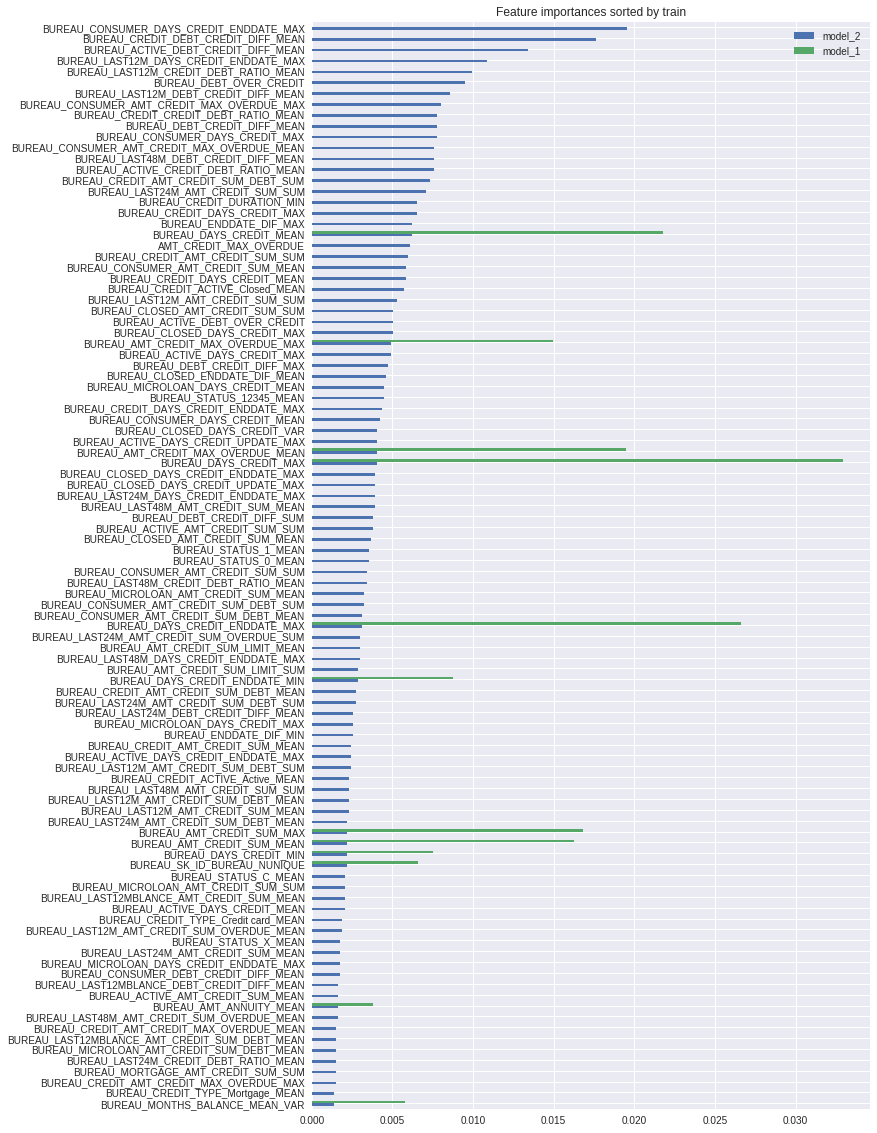

In [0]:
ax = imp.sort_values('model_2').tail(100).plot.barh(
    title='Feature importances sorted by train', figsize=(10,20))

In [0]:
# Drop some less-information features
# imp[imp['model_2'] == 0].index
feature_names = X_2.columns
cols = pd.DataFrame(index=feature_names)
cols['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

bureau_cols = bureau.columns
cols = cols[cols.index.isin(bureau_cols)]

cols[(cols['model_2'] == 0)].index

Index(['BUREAU_DEBT_TO_LIMIT_RATIO_MEAN', 'BUREAU_CREDIT_ACTIVE_Bad debt_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 1_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 2_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 3_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 4_MEAN',
       'BUREAU_CREDIT_TYPE_Another type of loan_MEAN',
       'BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN',
       'BUREAU_CREDIT_TYPE_Interbank credit_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for business development_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_MEAN',
       'BUREAU_CREDIT_TYPE_Mobile operator loan_MEAN',
       'BUREAU_CREDIT_TYPE_Real estate loan_MEAN',
       'BUREAU_CREDIT_TYPE_Unknown type of loan_MEAN',
       'BUREAU_LAST12MBLANCE_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BUREAU_LAST24MBLANCE_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BUREAU_LAST24MBLANCE_AMT_CREDIT_SUM_OVERDUE_SUM',
       'B

In [0]:
# Drop some less-information features
# imp[imp['model_2'] == 0].index
feature_names = X_2.columns
cols = pd.DataFrame(index=feature_names)
cols['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

bureau_cols = bureau.columns
cols = cols[cols.index.isin(bureau_cols)]

cols[(cols['model_2'] == 0)].index

Index(['BUREAU_CREDIT_ACTIVE_Bad debt_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 1_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 2_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 3_MEAN',
       'BUREAU_CREDIT_CURRENCY_currency 4_MEAN',
       'BUREAU_CREDIT_TYPE_Another type of loan_MEAN',
       'BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN',
       'BUREAU_CREDIT_TYPE_Interbank credit_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for business development_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_MEAN',
       'BUREAU_CREDIT_TYPE_Loan for working capital replenishment_MEAN',
       'BUREAU_CREDIT_TYPE_Mobile operator loan_MEAN',
       'BUREAU_CREDIT_TYPE_Real estate loan_MEAN',
       'BUREAU_CREDIT_TYPE_Unknown type of loan_MEAN',
       'BUREAU_ACTIVE_ENDDATE_DIF_MEAN',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN',
       'BUREAU_CLOSED_AMT_CREDIT_SUM_OVERDUE_SUM',
   